In [1]:
import numpy as np
from scipy.stats import moyal
import matplotlib.pyplot as plt

def searchPk(x, np):
    tmp = 0
    pk = 0
    for i in x[:-1]:
        tmp = np[int(i)]
        if tmp > pk:
            pk = tmp
    return pk

def getArea(x, np):
    summ = 0
    for i in x[:-1]:
        summ += np[int(i)]
    return summ

In [2]:
x25 = np.linspace(25, 400, 400//25)
x833 = np.linspace(8.33, 400, int(400/8.33))
x1 = np.linspace(1, 400, 400)

In [3]:
pulses = np.loadtxt("rmdpulses.dat")
pulsesAmp = np.loadtxt("rmdpulsesAmpli.dat")

xtime = pulses.T[0]
yampl = pulses.T[1]

xtimeAmp = pulsesAmp.T[0]
yamplAmp = pulsesAmp.T[1]

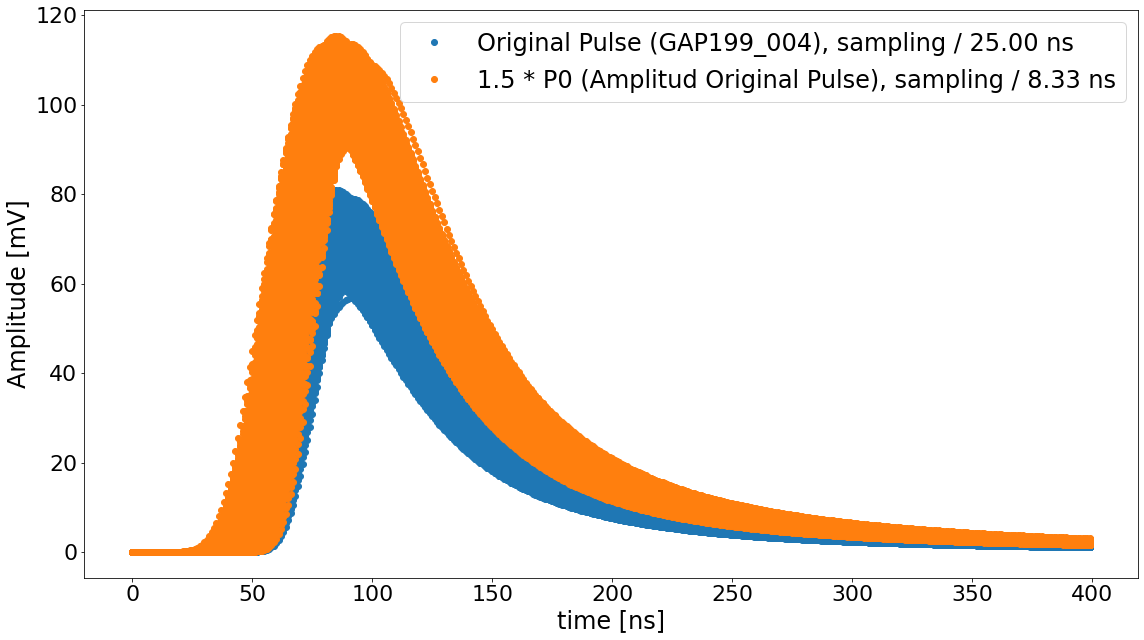

In [4]:
plt.figure(figsize=(16,9))

plt.plot(xtime, yampl, 'o', label='Original Pulse (GAP199_004), sampling / 25.00 ns')
plt.plot(xtimeAmp, yamplAmp, 'o', label='1.5 * P0 (Amplitud Original Pulse), sampling / 8.33 ns')

plt.legend(loc=0, fontsize=24)
plt.ylabel("Amplitude [mV]", fontsize=24)
plt.yticks(fontsize=22)
plt.xlabel("time [ns]", fontsize=24)
plt.xticks(fontsize=22)

plt.tight_layout()
plt.savefig("../plots/artifitialPulsesAmp.png", dpi=100)
plt.show()

In [5]:
sglpulse = []

for np in range( int(yampl.size/4e2) ):
    tmp = []
    tmpcnt = np*400
    for t in range(400):
        tmp.append( yampl[t+tmpcnt] )
    sglpulse.append( tmp )
    
sglpulseAmp = []

for np in range( int(yamplAmp.size/4e2) ):
    tmp = []
    tmpcnt = np*400
    for t in range(400):
        tmp.append( yamplAmp[t+tmpcnt] )
    sglpulseAmp.append( tmp )

In [6]:
import numpy as np
pkhist25 = np.zeros(200, int)
pkhist833 = np.zeros(200, int)

chhist25 = np.zeros(500, int)
chhist833 = np.zeros(500, int)

factorCh25 = 25./50.
factorCh833 = 8.33/50.

for i in range(len(sglpulse)):    
    pkhist25[ int(searchPk(x25, sglpulse[i])) ] += 1
    pkhist833[ int(searchPk(x833, sglpulseAmp[i])) ] += 1
    
    chhist25[ int(getArea(x25, sglpulse[i])*factorCh25) ] += 1
    chhist833[ int(getArea(x833, sglpulseAmp[i])*factorCh833) ] += 1

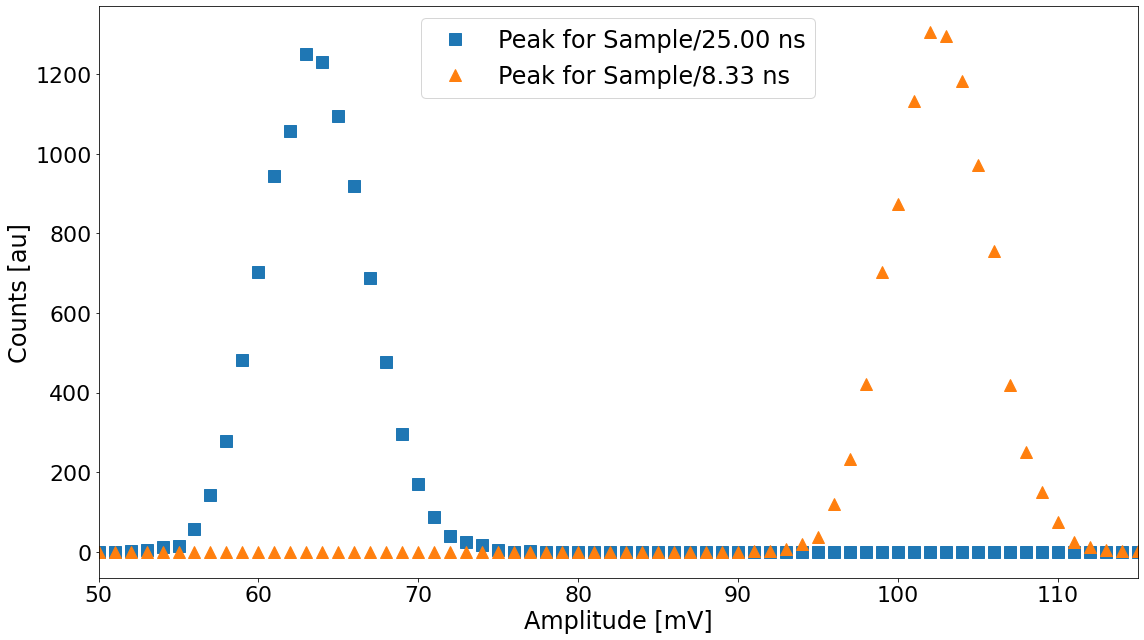

In [7]:
plt.figure(figsize=(16,9))

plt.plot(pkhist25, 's', ms=12, label="Peak for Sample/25.00 ns")
plt.plot(pkhist833, '^', ms=12, label="Peak for Sample/8.33 ns")

plt.legend(fontsize=24)
plt.ylabel("Counts [au]", fontsize=24)
plt.yticks(fontsize=22)
plt.xlabel("Amplitude [mV]", fontsize=24)
plt.xticks(fontsize=22)
plt.xlim(50,115)

plt.tight_layout()
plt.savefig("../plots/samplingPkHistosAmp.png", dpi=100)
plt.show()

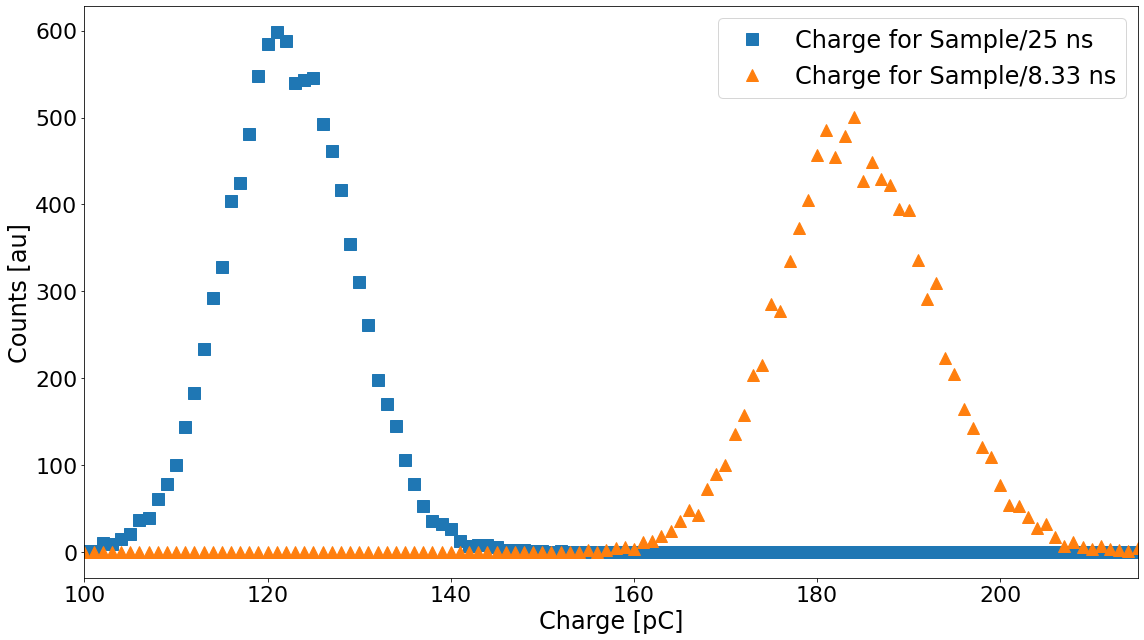

In [8]:
plt.figure(figsize=(16,9))

plt.plot(chhist25, 's', ms=12, label="Charge for Sample/25 ns")
plt.plot(chhist833, '^', ms=12, label="Charge for Sample/8.33 ns")

plt.legend(fontsize=24)
plt.ylabel("Counts [au]", fontsize=24)
plt.yticks(fontsize=22)
plt.xlabel("Charge [pC]", fontsize=24)
plt.xticks(fontsize=22)
plt.xlim(100,215)

plt.tight_layout()
plt.savefig("../plots/samplingChHistosAmp.png", dpi=100)
plt.show()

In [9]:
print("Averages for 25 ns:")

averagePk25 = 0
tmpcnt = 0
for pk in range(pkhist25.size):
    if pkhist25[pk] > 0:
        averagePk25 += pk*pkhist25[pk]
        tmpcnt += pkhist25[pk]
        
averagePk25 /= tmpcnt
print("Peak:", averagePk25, "[mV]")


averageCh25 = 0
tmpcnt = 0
for ch in range(chhist25.size):
    if chhist25[ch] > 0:
        averageCh25 += ch*chhist25[ch]
        tmpcnt += chhist25[ch]
        
averageCh25 /= tmpcnt
print("Charge", averageCh25,"[pC]")
print("AoP:",  averageCh25/averagePk25, "[nF]")


print("\n")
print("Averages for 8.33 ns:")

averagePk833 = 0
tmpcnt = 0
for pk in range(pkhist833.size):
    if pkhist833[pk] > 0:
        averagePk833 += pk*pkhist833[pk]
        tmpcnt += pkhist833[pk]

averagePk833 /= tmpcnt
print("Peak:", averagePk833,"[mV]")

averageCh833 = 0
tmpcnt = 0
for ch in range(chhist833.size):
    if chhist833[ch] > 0:
        averageCh833 += ch*chhist833[ch]
        tmpcnt += chhist833[ch]
        
averageCh833 /= tmpcnt
print("Charge:", averageCh833,"[pC]")
print("AoP:", averageCh833/averagePk833, "[nF]" )

print("\n")
print("AoP ratio for 25 ns and 8.33 ns:")
print( (averageCh25/averagePk25) / (averageCh833/averagePk833) )

print("\n")
print("1-Pk25/Pk833:")
print(1-averagePk25/averagePk833)

print("\n")
print("1-Ch25/Ch833:")
print(1-averageCh25/averageCh833)

Averages for 25 ns:
Peak: 63.5958 [mV]
Charge 122.3581 [pC]
AoP: 1.9239965532315026 [nF]


Averages for 8.33 ns:
Peak: 102.622 [mV]
Charge: 184.2321 [pC]
AoP: 1.795249556625285 [nF]


AoP ratio for 25 ns and 8.33 ns:
1.0717153757989148


1-Pk25/Pk833:
0.38029077585702875


1-Ch25/Ch833:
0.3358480959615616
